In [73]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/cleaned.csv')[['HE4','CEA']]
df_meta = pd.read_csv('data/non_bm.csv')[['TYPE']]

In [98]:
def new_split(df, df_meta):
    from sklearn.model_selection import train_test_split
    df_concat = pd.concat([df,df_meta],axis=1)

    df_meta1 = df_concat[['TYPE']]

    df2, df3 = train_test_split(df_concat, test_size=0.325, stratify=df_meta1['TYPE'])
    df_meta2 = df2[['TYPE']]
    df_meta3 = df3[['TYPE']]

    df_out = pd.concat([df2,df3],axis=0)
    df_meta_out = pd.concat([df_meta2,df_meta3],axis=0)

    return df_out, df_meta_out

In [90]:
# split into train and test with 50/50 class balance
from sklearn.model_selection import train_test_split
df_concat = pd.concat([df,df_meta],axis=1)

df1 = df[['HE4','CEA']]
df_meta1 = df_concat[['TYPE']]

df2, df3 = train_test_split(df_concat, test_size=0.325, stratify=df_meta1['TYPE'])
df_meta2 = df2[['TYPE']]
df_meta3 = df3[['TYPE']]
df2 = df2[['HE4','CEA']]
df3 = df3[['HE4','CEA']]

df_out = pd.concat([df2,df3],axis=0)
df_meta_out = pd.concat([df_meta2,df_meta3],axis=0)

In [101]:
df_out, df_meta_out = new_split(pd.read_csv('data/cleaned.csv'), pd.read_csv('data/non_bm.csv')[['TYPE']])
df_out

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,...,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
65,3.580,22.01,47.7,62.0,9.0,13.0,0.04,0.60,5.27,2.61,...,0.280,14.20,1.18,243.0,4.78,13.20,6.5,69.8,191.0,0.0
173,2.200,14.35,39.8,38.0,11.0,11.0,0.05,0.45,2.73,2.31,...,0.135,16.90,1.19,200.0,4.04,15.20,7.2,64.0,208.2,1.0
156,1.380,19.88,40.6,69.0,17.0,14.0,0.02,0.30,4.00,2.29,...,0.192,16.06,1.15,197.0,4.82,15.36,12.5,69.8,200.6,1.0
329,2.640,20.99,41.4,80.0,16.0,21.0,0.02,0.30,3.95,2.54,...,0.230,13.00,1.15,214.0,4.57,11.60,12.9,71.3,227.2,1.0
250,3.630,15.44,50.2,90.0,27.0,34.0,0.05,0.90,3.85,2.53,...,0.290,10.80,1.60,306.0,4.76,11.70,21.3,75.4,329.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,4.518,22.06,32.0,66.0,7.0,13.0,0.00,0.20,4.04,2.28,...,0.356,16.20,1.42,496.0,3.51,17.00,4.6,60.7,275.9,0.0
72,1.770,20.33,41.5,54.0,24.0,22.0,0.01,0.20,2.58,2.32,...,0.270,14.60,1.14,245.0,4.19,16.70,10.8,78.3,230.1,0.0
305,0.800,20.42,44.1,63.0,15.0,21.0,0.01,0.20,2.22,2.58,...,0.290,13.10,1.04,247.0,4.59,14.80,4.6,81.5,226.1,1.0
189,4.090,17.80,40.7,143.0,14.0,11.0,0.04,0.84,4.33,2.49,...,0.178,16.50,1.19,268.0,4.72,12.20,8.4,71.3,235.4,1.0


In [75]:
# df2 = df1.iloc[:235]
# df_meta2 = df_meta1.iloc[:235]

# df3 = df1.iloc[235:]
# df_meta3 = df_meta1.iloc[235:]

In [76]:
colors = df_meta1
colors = colors.replace(1, 0.4)
colors = colors.replace(0, 1)

colors2 = df_meta2
colors2 = colors2.replace(1, 0.4)
colors2 = colors2.replace(0, 1)

colors3 = df_meta3
colors3 = colors3.replace(1, 0.4)
colors3 = colors3.replace(0, 1)

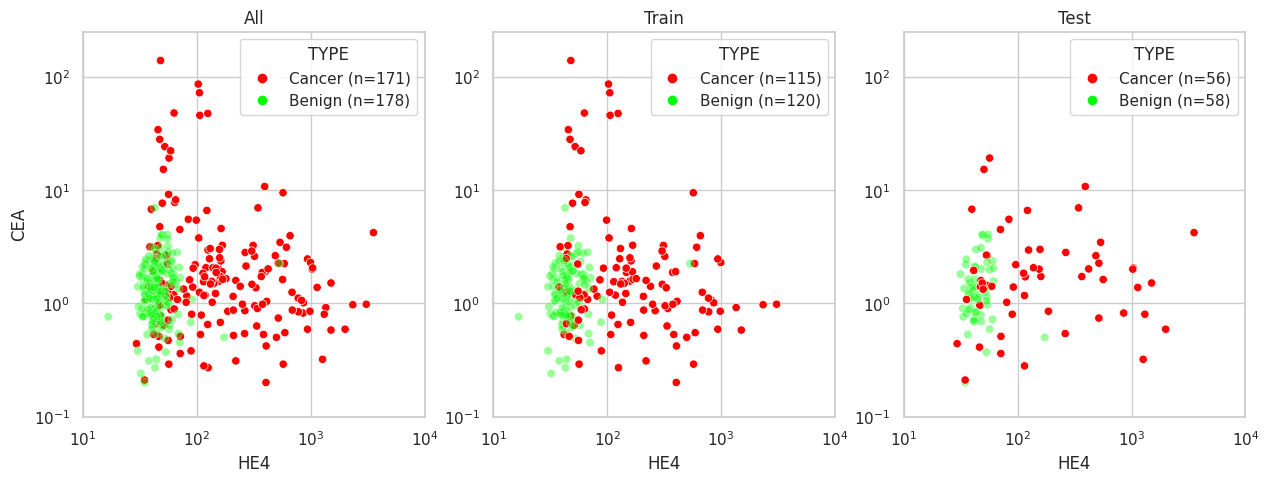

In [77]:
# plot 2d scatter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# plot
fig, axs = plt.subplots(1,3, figsize=(15,5))
for ax in axs:
    # set loglog
    ax.set_ylim(0.1, 250)
    ax.set_xlim(10, 10000)
    ax.set_xscale('log')
    ax.set_yscale('log')

custom_palette = {0: 'red', 1: 'lime'}    
sns.scatterplot(x='HE4', y='CEA', hue='TYPE', palette=custom_palette, ax=axs[0], alpha=colors, data=pd.concat([df1, df_meta1], axis=1), legend=False)
sns.scatterplot(x='HE4', y='CEA', hue='TYPE', palette=custom_palette, ax=axs[1], alpha=colors2, data=pd.concat([df2, df_meta2], axis=1), legend=False)
sns.scatterplot(x='HE4', y='CEA', hue='TYPE', palette=custom_palette, ax=axs[2], alpha=colors3, data=pd.concat([df3, df_meta3], axis=1), legend=False)

axs[0].set_title('All')
axs[1].set_title('Train')
axs[2].set_title('Test')
axs[1].set_ylabel('')
axs[2].set_ylabel('')

# Custom legends
legend_labels = ['0', '1']  # Replace with your custom labels
legend_colors = ['red', 'lime']  # Replace with your custom colors

cn1 = df_meta1['TYPE'].value_counts()
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=8) for label, color in zip([f'Cancer (n={cn1[0]})',f'Benign (n={cn1[1]})'], legend_colors)]
axs[0].legend(handles=custom_legend, title='TYPE')

cn2 = df_meta2['TYPE'].value_counts()
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=8) for label, color in zip([f'Cancer (n={cn2[0]})',f'Benign (n={cn2[1]})'], legend_colors)]
axs[1].legend(handles=custom_legend, title='TYPE')

cn3 = df_meta3['TYPE'].value_counts()
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=8) for label, color in zip([f'Cancer (n={cn3[0]})',f'Benign (n={cn3[1]})'], legend_colors)]
axs[2].legend(handles=custom_legend, title='TYPE')


plt.show()

In [78]:
cn

1.0    178
0.0    171
Name: TYPE, dtype: int64